In [328]:
# Warning
import warnings
warnings.filterwarnings("ignore")

# Main Library
import pandas as pd 
import numpy as np
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)

# Visualization Library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [329]:
dataset = pd.read_csv("nike_shoes_sales.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   643 non-null    object 
 1   product_id     643 non-null    object 
 2   listing_price  643 non-null    int64  
 3   sale_price     643 non-null    int64  
 4   discount       643 non-null    int64  
 5   brand          643 non-null    object 
 6   description    640 non-null    object 
 7   rating         643 non-null    float64
 8   reviews        643 non-null    int64  
 9   images         572 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 50.4+ KB


In [330]:
print(dataset)

                             product_name  product_id  listing_price  sale_price  discount brand                                        description  rating  reviews                                             images
0          Nike Air Force 1 '07 Essential  CJ1646-600              0        7495         0  Nike  Let your shoe game shimmer in the Nike Air For...     0.0        0  ["https://static.nike.com/a/images/t_PDP_1728_...
1                    Nike Air Force 1 '07  CT4328-101              0        7495         0  Nike  The legend lives on in the Nike Air Force 1 '0...     0.0        0  ["https://static.nike.com/a/images/t_PDP_1728_...
2            Nike Air Force 1 Sage Low LX  CI3482-200              0        9995         0  Nike  Taking both height and craft to new levels, th...     0.0        0  ["https://static.nike.com/a/images/t_PDP_1728_...
3                     Nike Air Max Dia SE  CD0479-200              0        9995         0  Nike  Designed for a woman's foot, the Nike 

In [331]:
dataset.isnull().sum()

product_name      0
product_id        0
listing_price     0
sale_price        0
discount          0
brand             0
description       3
rating            0
reviews           0
images           71
dtype: int64

In [332]:
df = dataset.ffill()
df.isnull().sum()

product_name     0
product_id       0
listing_price    0
sale_price       0
discount         0
brand            0
description      0
rating           0
reviews          0
images           0
dtype: int64

In [333]:
df

,product_name,product_id,listing_price,sale_price,discount,brand,description,rating,reviews,images
0,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,Let your shoe game shimmer in the Nike Air For...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
1,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,The legend lives on in the Nike Air Force 1 '0...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
2,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,"Taking both height and craft to new levels, th...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
3,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,"Designed for a woman's foot, the Nike Air Max ...",0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
4,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,Pass on the good vibes in the Nike Air Max Ver...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
...,...,...,...,...,...,...,...,...,...,...
638,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_..."
639,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,"[""https://static.nike.com/a/images/t_PDP_1728_..."
640,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,"[""https://static.nike.com/a/images/t_PDP_1728_..."
641,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,"[""https://static.nike.com/a/images/t_PDP_1728_..."


In [334]:
filtered_df = dataset[["product_name", "rating"]].value_counts().reset_index(name="count").sort_values("rating", ascending=False)
filtered_df.head(5)

,product_name,rating,count
0,Nike Air Max 90,5.0,5
261,Nike SB Blazer Low XT,5.0,1
229,Nike Renew Fusion,5.0,1
231,Nike React Sertu,5.0,1
232,Nike React Presto Premium,5.0,1


In [335]:
df1 = df.groupby('product_name')['rating'].apply(set)
filtered_df1 = df1[df1.apply(lambda x: x == {5.0})]

In [336]:
print(filtered_df1)
print("\nProducts with 5.0 rating : ", len(filtered_df1))

product_name
Air Jordan 1 Jester XX Low Laced        {5.0}
Air Jordan 1 Nova XX                    {5.0}
Air Jordan 13 Retro Chinese New Year    {5.0}
Air Jordan 8 Retro                      {5.0}
Air Jordan XXXIV PF                     {5.0}
                                        ...  
Nike x Hawkins High Cortez              {5.0}
Nike x Olivia Kim Air Force 1 '07       {5.0}
Nike x Undercover React Presto          {5.0}
NikeCourt Royale AC                     {5.0}
Zoom Freak 1 'Employee of the Month'    {5.0}
Name: rating, Length: 71, dtype: object

Products with 5.0 rating :  71


In [337]:
df2 = df[(df['product_name'] == 'Nike Air Max 97')]
filtered_df2 = df[(df['product_name'] == 'Nike Air Max 97') & (df['rating'] == 4.3)]

In [338]:
print(df2)
print("")
print(filtered_df2)

        product_name  product_id  listing_price  sale_price  discount brand                                        description  rating  reviews                                             images
17   Nike Air Max 97  921733-104              0       16995         0  Nike  The Nike Air Max 97 keeps a sneaker icon going...     4.3       16  ["https://static.nike.com/a/images/t_PDP_1728_...
20   Nike Air Max 97  CT4525-001              0       15995         0  Nike  Remastered from the OG that shook up the runni...     0.0        0  ["https://static.nike.com/a/images/t_PDP_1728_...
58   Nike Air Max 97  CI3708-700              0       14995         0  Nike  The Air Max 97 shook up the running world with...     5.0        1  ["https://static.nike.com/a/images/t_PDP_1728_...
131  Nike Air Max 97  CT4526-100              0       15995         0  Nike  Remastered from the OG that shook up the runni...     5.0        1  ["https://static.nike.com/a/images/t_PDP_1728_...
456  Nike Air Max 97  921

In [339]:
df3 = df[df['reviews'] == 9]
filtered_df3 = df[df['rating'] == 5.0][["product_name", "sale_price", "rating", "reviews"]].sort_values("reviews", ascending=False)

In [340]:
print(df3)
print("")
print(filtered_df3.head(10))


                       product_name  product_id  listing_price  sale_price  discount brand                                        description  rating  reviews                                             images
10                  Nike Air Max 90  CD0490-104              0        9995         0  Nike  Clean lines, versatile and timeless—the people...     5.0        9  ["https://static.nike.com/a/images/t_PDP_1728_...
70                  Nike Air Max 90  CD0490-101              0        9995         0  Nike  Clean lines, versatile and timeless—the people...     5.0        9  ["https://static.nike.com/a/images/t_PDP_1728_...
77                Nike Legend React  AA1625-009              0        8795         0  Nike  The Nike Legend React Men's Running Shoe featu...     4.2        9  ["https://static.nike.com/a/images/t_PDP_1728_...
124                Nike React Ianga  AV5555-001          10995        8797         0  Nike  The Nike React Ianga takes elements from a jun...     4.3        9  

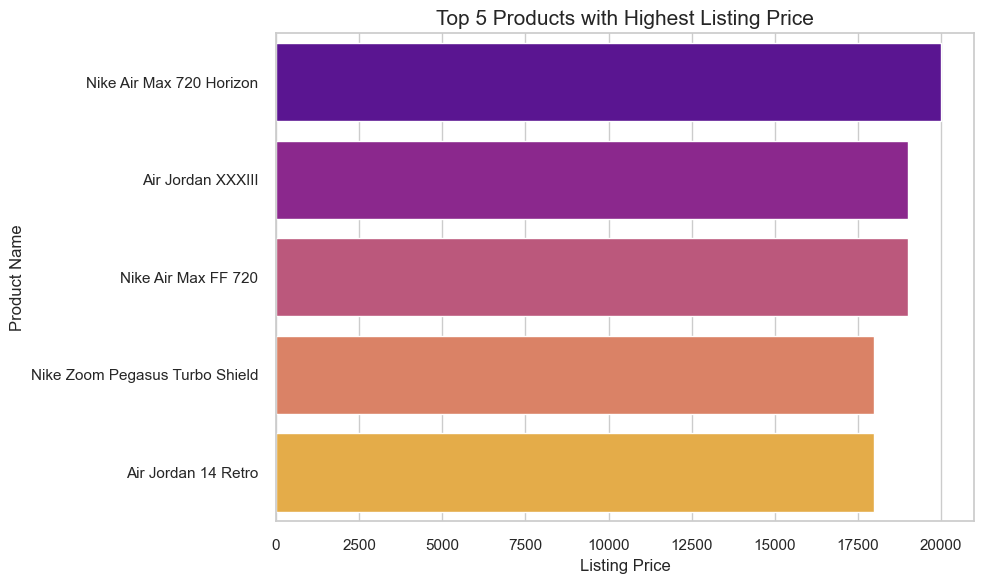

In [341]:
top_5_listing_price = df.sort_values(by='listing_price', ascending=False).head(5)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y='product_name', x='listing_price', data=top_5_listing_price, palette='plasma', ax=ax)

ax.set_title('Top 5 Products with Highest Listing Price', fontsize=15)
ax.set_xlabel('Listing Price', fontsize=12)
ax.set_ylabel('Product Name', fontsize=12)
ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

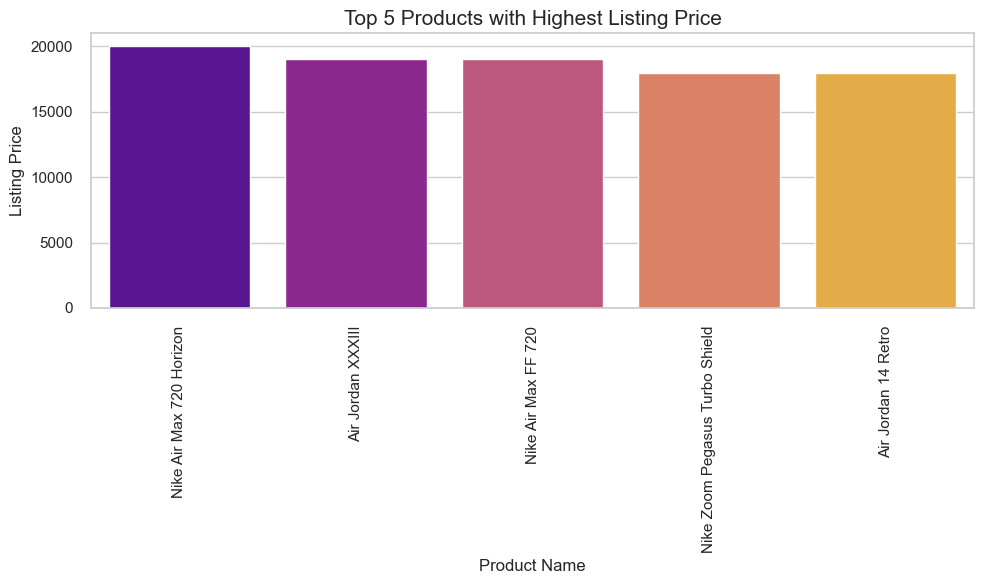

In [342]:
top_5_listing_price = df.sort_values(by='listing_price', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='listing_price', data=top_5_listing_price, palette='plasma')
plt.xticks(rotation=90)
plt.title('Top 5 Products with Highest Listing Price', fontsize=15)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Listing Price', fontsize=12)
plt.tight_layout()
plt.show()


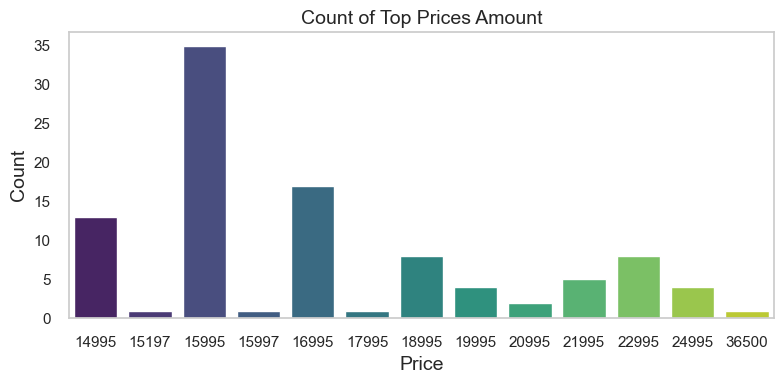

In [343]:
top_price_amount = df.sort_values(by='sale_price', ascending=False).head(100)

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=top_price_amount, x="sale_price", palette="viridis", ax=ax)

ax.set_title("Count of Top Prices Amount", fontsize=14)
ax.set_xlabel("Price", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.grid(axis='y')

plt.tight_layout()
plt.show()


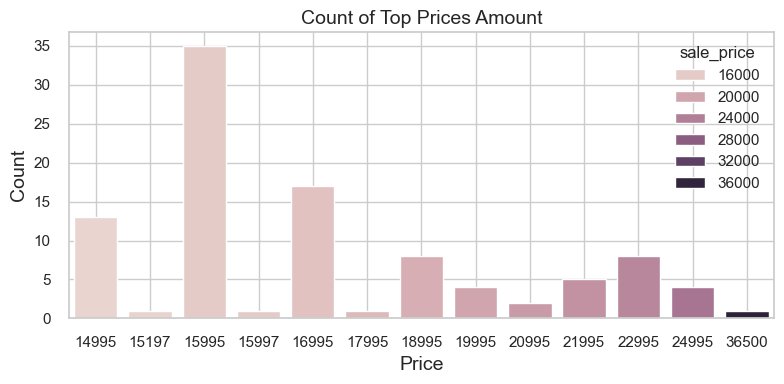

In [344]:
top_price_amount = df.sort_values(by='sale_price', ascending=False).head(100)

fig, ax = plt.subplots(figsize= (8,4))
sns.countplot(data=top_price_amount, x="sale_price", hue="sale_price")

ax.set_title("Count of Top Prices Amount", fontsize=14)
ax.set_xlabel("Price", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.grid(True)

plt.tight_layout()
plt.show()

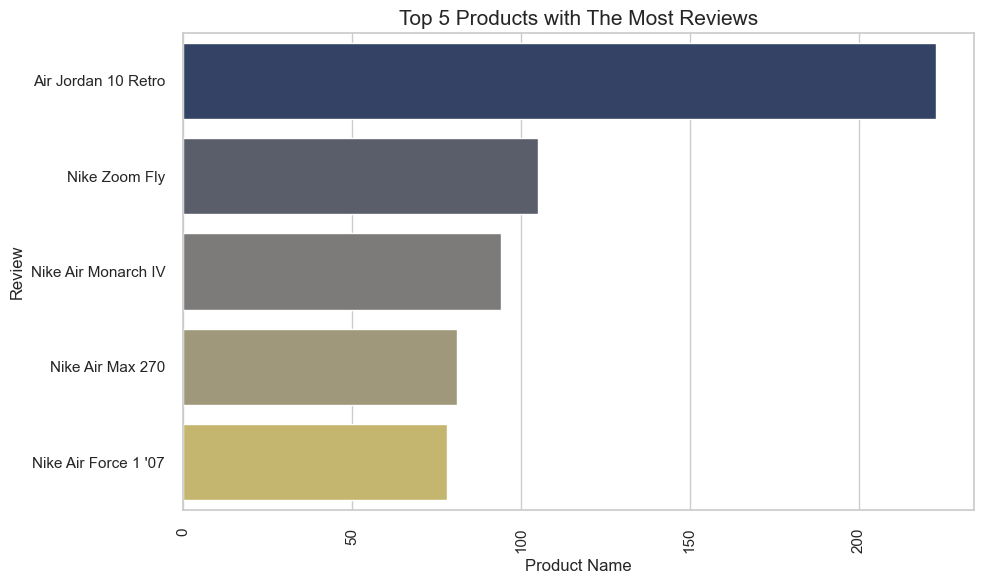

In [345]:
top_5_reviews = df.sort_values(by='reviews', ascending=False).head(5)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y='product_name', x='reviews', data=top_5_reviews, palette='cividis', ax=ax)
ax.set_title('Top 5 Products with The Most Reviews', fontsize=15)
ax.set_xlabel('Product Name', fontsize=12)
ax.set_ylabel('Review', fontsize=12)
ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


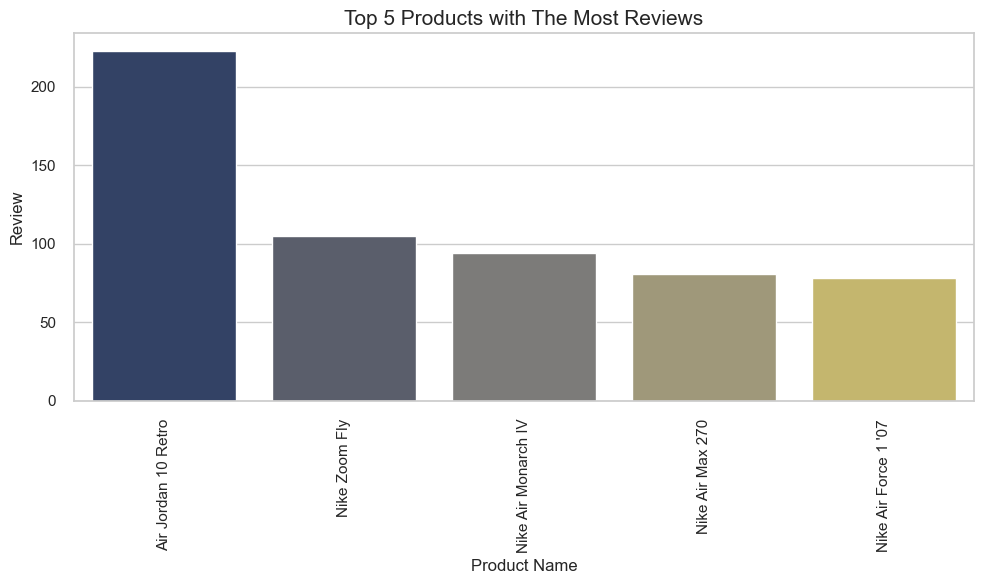

In [346]:
top_5_reviews = df.sort_values(by='reviews', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='reviews', data=top_5_reviews, palette='cividis')
plt.xticks(rotation=90)
plt.title('Top 5 Products with The Most Reviews', fontsize=15)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Review', fontsize=12)
plt.tight_layout()
plt.show()


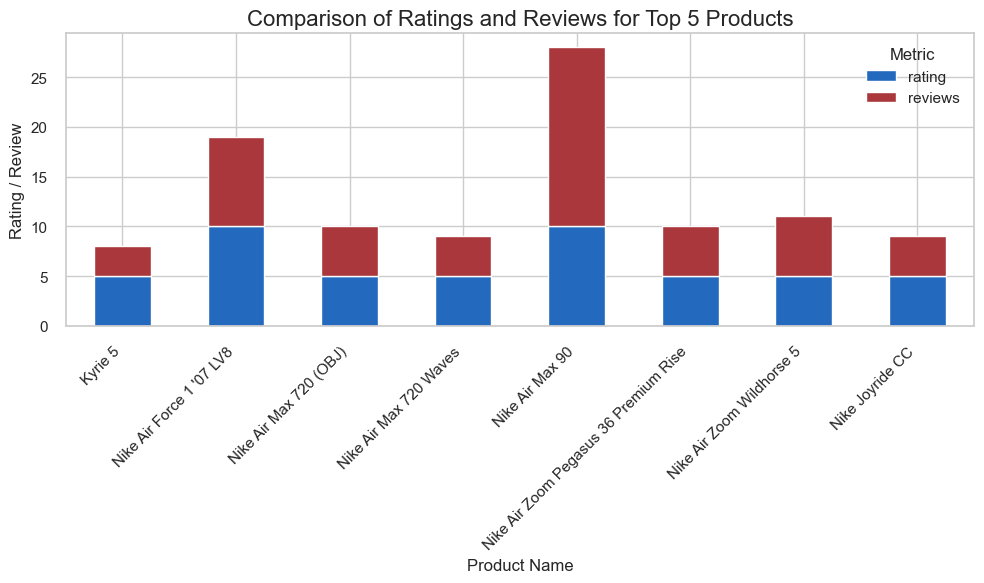

In [347]:
top_5_reviews = filtered_df3.sort_values(by="reviews", ascending=False).head(10)

melted_df = top_5_reviews.melt(id_vars="product_name", value_vars=["rating", "reviews"], var_name="Metric", value_name="Value")
df_new = melted_df.pivot_table(index="product_name", columns="Metric", values="Value", aggfunc="sum")

fig, ax = plt.subplots(figsize=(10, 6))
df_new.plot(kind="bar", stacked=True, ax=ax, colormap="vlag")

ax.set_title("Comparison of Ratings and Reviews for Top 5 Products", fontsize=16)
ax.set_xlabel("Product Name", fontsize=12)
ax.set_ylabel("Rating / Review", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

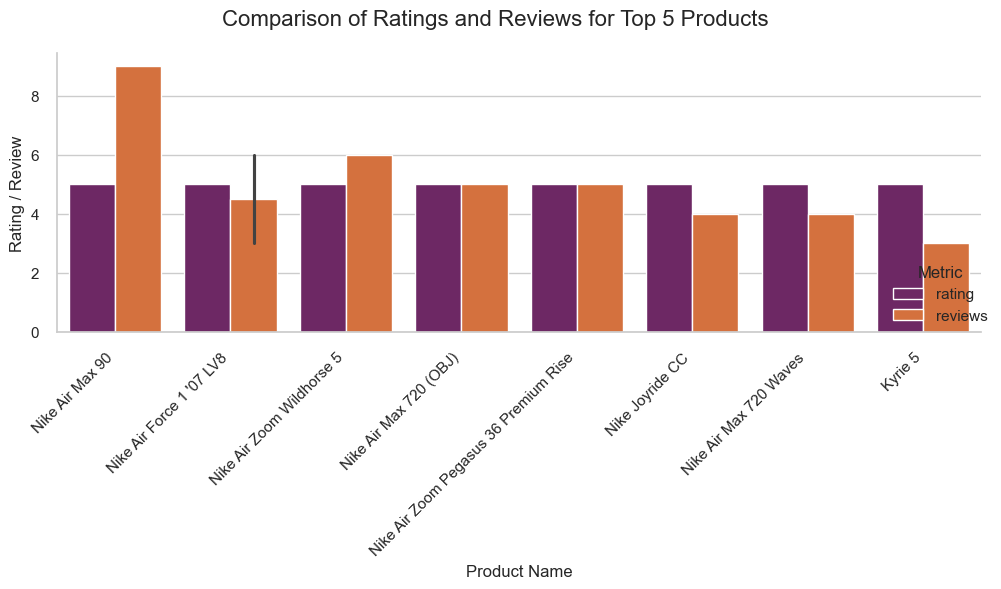

In [348]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

top_5_reviews = filtered_df3.sort_values(by="reviews", ascending=False).head(10)

melted_df = top_5_reviews.melt(id_vars="product_name", value_vars=["rating", "reviews"], var_name="Metric", value_name="Value")

sns.set(style="whitegrid")
g = sns.catplot(data=melted_df,x="product_name",y="Value",hue="Metric",kind="bar",height=6,aspect=1.5,palette="inferno")

g.fig.suptitle("Comparison of Ratings and Reviews for Top 5 Products", fontsize=16)
g.set_axis_labels("Product Name", "Rating / Review")
g.set_xticklabels(rotation=45, ha='right')
g._legend.set_title("Metric")

plt.tight_layout()
plt.show()
